# Assignment 5 Hypothesis Testing

* In this assignment, you will create confidence intervals and conduct hypothesis tests
* You will analyze healthcare data on risk characteristics for low birth weight babies
* The data contains demographic data and risk characteristics for 189 mothers, where some of the mothers had low birth weight infants and some did not
* The deidentified data were collected at Baystate Medical in Center, Springfield, Mass during 1986. 

#### Data Variables
+ lowbwt: indicator of birth weight less than 2.5 kg. (0=not low birth weight,1= low birth weight)
+ age: mother’s age in years
+ bwt: babies’ birth weight in grams

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data file
df = pd.read_csv('bwt.csv')

In [3]:
# display column names
df.columns

Index(['age', 'bwt', 'lowbwt'], dtype='object')

In [4]:
# display data frame column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     189 non-null    int64
 1   bwt     189 non-null    int64
 2   lowbwt  189 non-null    int64
dtypes: int64(3)
memory usage: 4.6 KB


In [5]:
# display the head of the data
df.head(10)

,age,bwt,lowbwt
0,19,2523,0
1,33,2551,0
2,20,2557,0
3,21,2594,0
4,18,2600,0
5,21,2622,0
6,22,2637,0
7,17,2637,0
8,29,2663,0
9,26,2665,0


# Data Visualization (missing data, outliers, distribution )

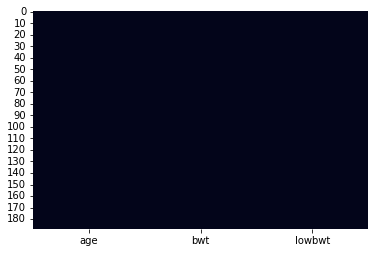

In [6]:
# check for missing data for all columns
# no missing data
df.count()

# using seaborn heatmap to check for missing data
sns.heatmap(df.isnull(), cbar=False);

In [7]:
# Generate descriptive statistics for all the data
df.describe()

,age,bwt,lowbwt
count,189.000000,189.000000,189.000000
mean,23.238095,2944.587302,0.312169
std,5.298678,729.214295,0.464609
min,14.000000,709.000000,0.000000
25%,19.000000,2414.000000,0.000000
50%,23.000000,2977.000000,0.000000
75%,26.000000,3487.000000,1.000000
max,45.000000,4990.000000,1.000000


In [8]:
# print the value counts for lowbwt
df.lowbwt.value_counts()
# 139 not low births and 59 lowbirths

0    130
1     59
Name: lowbwt, dtype: int64

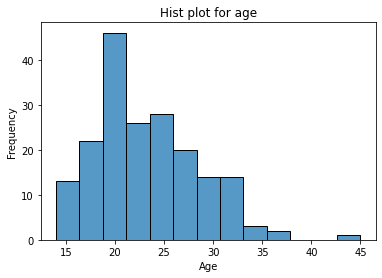

In [9]:
#  create a Seaborn histogram of age with a title & x and y labels
ax = sns.histplot(df['age']);
ax.set(title='Hist plot for age',xlabel='Age',ylabel='Frequency');

<AxesSubplot:>

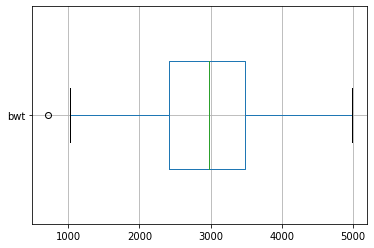

In [10]:
# create a boxplot for birthweight

df.boxplot(column = 'bwt', vert = False, widths = 0.5)

In [11]:
# Analysis: type in answers
# State the range of the ages of the mothers? 
## the range of the mothers age is 31
# State the range of the babies' birth weight in grams? 
## the range is 4281
# How many observations are in the data set?
## 189 observations
# How many women had low birth weight babies?
## 59 women had low births
# Does the age data have a right or left skew? 
## right skew, slops to the right
# Are there outliers on the birthweight boxplot? If yes, then how many? 
## Yes 
# Tukey Outliers
def myfunction(x):
    q1 = np.percentile(x,25)
    q3 =   np. percentile (x,75)
    iqr   = q3 - q1
    floor = q1 - 1.5* iqr
    ceiling   =   q3   +   1.5*iqr
    
    outlier_indices   =   list(x. index [( x   <   floor) |( x   >   ceiling )]) 
    outlier_values   =   list(x[ outlier_indices ])

    return outlier_indices , outlier_values

tukey_indices , tukey_values = myfunction(df.bwt)

# Print the outliers
print('tukey_indices = ',tukey_indices)
print('tukey_values= ',tukey_values)


tukey_indices =  [130]
tukey_values=  [709]


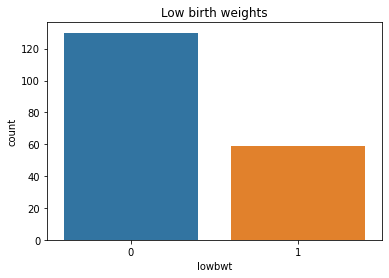

In [12]:
# create a Seaborn countplot of lowbwt, with a title & x and y labels
sns.countplot(x="lowbwt", data=df)
plt.title('Low birth weights');

In [13]:
# Confidence interval
# Construct a 95% Confidence interval at alpha = 0.05
# We want to know if there is evidence that the mean bwt is different from 2600 grams?
# Ho: mean bwt = 2600 grams 
# H1: mean bwt <> 2600 grams

import scipy.stats as stats  
bwtmean = round(np.mean(df.bwt),2) 
sem = round(stats.sem(df.bwt),4)
 
print('mean = ',bwtmean)
print('sem = ',sem)

lb = round(bwtmean - (1.96 * sem),3)
ub  = round(bwtmean + (1.96 * sem),3)

print('For 95% CI =(',lb,',',ub,')')

mean =  2944.59
sem =  53.0425
For 95% CI =( 2840.627 , 3048.553 )


In [14]:
# Analysis: Complete this sentence for the confidence interval: 
# We ___reject____the null hypothesis because the confidence interval ___does not______  contain 2600 grams.
# We conclude there is evidence that the mean bwt ______is different from____________ 2600 grams.

In [15]:
# T-test: for alpha = 0.05, conduct a T-test for these hypotheses and display the results.
# Ho: mean age = 40 years 
# H1: mean age <> 40 years
res = stats.ttest_1samp(df.age,40)
print('one sample t-test=',res)

one sample t-test= Ttest_1sampResult(statistic=-43.48973366289455, pvalue=4.678881937408121e-100)


In [16]:
# Analysis: For the t-test, complete this sentence
# Because p __<___ alpha, we ____reject__ the null hypothesis 
# and conclude the mean age for mothers _____different_____than 40 years